In [206]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [136]:
mouse_file = "data/Mouse_metadata.csv"
mouse_df = pd.read_csv(mouse_file, encoding="ISO-8859-1")
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [137]:
study_file = "data/Study_results.csv"
study_df = pd.read_csv(study_file, encoding="ISO-8859-1")
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [138]:
study_df.count
study_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [139]:
mouse_df_group = mouse_df.groupby("Mouse ID")

mouse_df_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [140]:
study_renamed = study_df.rename(columns={"Mouse ID": "Mouse_ID",
                                                    "Tumor Volume (mm3)": "Tumor_Volume",
                                                    "Metastatic Sites": "Metastatic_Sites"})
mouse_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [141]:
mouse_renamed = mouse_df.rename(columns={"Mouse ID": "Mouse_ID", 
                                         "Drug Regimen": "Drug_Regimen",
                                         "Weight (g)": "Weight(g)"})

drug_names = mouse_renamed.Drug_Regimen.unique()

In [142]:
mouse_study_df=pd.merge(mouse_renamed,study_renamed, on=("Mouse_ID"), how= "outer")
mouse_study_df

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [143]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates
mouse_study_clean = mouse_study_df.drop_duplicates(subset= ('Mouse_ID', 'Timepoint'))

mouse_study_clean

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight(g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [144]:
null_values = mouse_study_clean.isnull()
row_has_NaN = null_values.any(axis=1)
rows_with_NaN = mouse_study_clean[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [Mouse_ID, Drug_Regimen, Sex, Age_months, Weight(g), Timepoint, Tumor_Volume, Metastatic_Sites]
Index: []


In [145]:
mouse_study_clean.Drug_Regimen.unique()
drug_df = mouse_study_clean.loc[:, ["Drug_Regimen", "Tumor_Volume"]]
drug_df_index = drug_df.set_index('Drug_Regimen')
# mean_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['mean']})).reset_index())
# median_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['median']})).reset_index())
# var_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['var']})).reset_index())
# std_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['std']})).reset_index())
# sem_df = pd.DataFrame((drug_df.groupby(['Drug_Regimen']).agg({"Tumor_Volume":['sem']})).reset_index())

# mean_med = pd.merge(mean_df, median_df, on="Drug_Regimen")
# mm_var = pd.merge(mean_med, var_df, on="Drug_Regimen")
# mmv_std = pd.merge(mm_var, std_df, on="Drug_Regimen")
# tumor_summary_df = pd.merge(mmv_std, sem_df, on="Drug_Regimen")

drug_df_index.head()

,Tumor_Volume
Drug_Regimen,
Ramicane,45.000000
Ramicane,38.825898
Ramicane,35.014271
Ramicane,34.223992
Ramicane,32.997729


In [146]:
grouped_drug = drug_df_index.groupby("Drug_Regimen")

In [147]:
# ramicane = mouse_study_df.loc[mouse_study_df['Drug_Regimen'] == 'Ramicane']
# capomulin = mouse_study_df.loc[mouse_study_df['Drug_Regimen'] == 'Capomulin']

vol_mean =  (grouped_drug.Tumor_Volume.mean())
vol_median =  (grouped_drug.Tumor_Volume.median())
vol_var =  (grouped_drug.Tumor_Volume.var())
vol_std =  (grouped_drug.Tumor_Volume.std())
vol_sem = (grouped_drug.Tumor_Volume.sem())

tumor_summary = pd.DataFrame({
                            "Mean": vol_mean,
                            "Median": vol_median,
                            "Variance": vol_var,
                            "Standard Deviation": vol_std,
                            "SEM": vol_sem})

tumor_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
#PIES AND BARS
# * medGenerate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's 
# `pyplot` that shows the total number of measurements taken for each treatment regimen 
# throughout the course of the study.

drug_counts = mouse_study_clean['Drug_Regimen'].value_counts()
drug_counts = pd.Series(drug_counts, name = "Drug_Regimen")
drug_counts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug_Regimen, dtype: int64

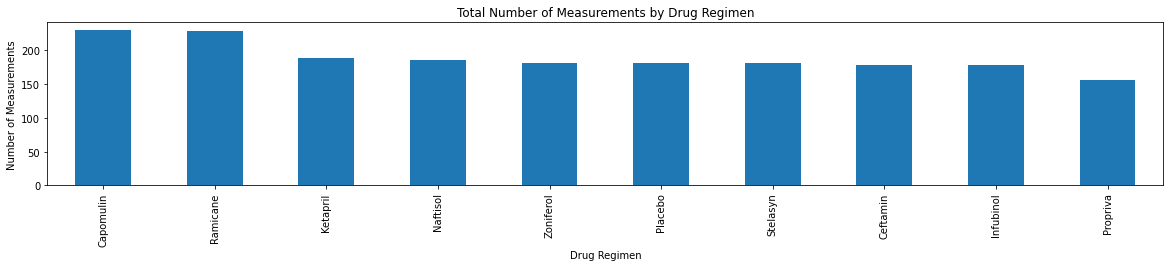

In [149]:
drug_counts.plot(kind="bar", figsize=(20,3))
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

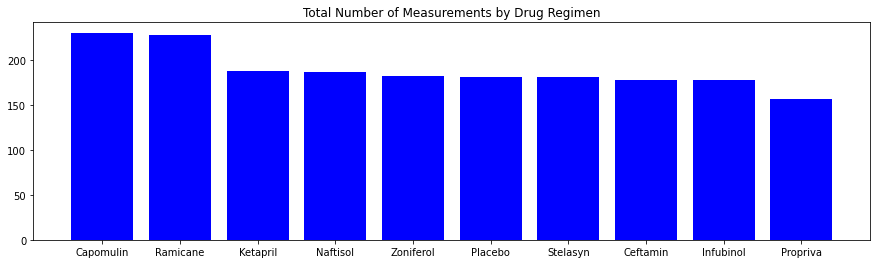

In [150]:
drug_counts_df = pd.DataFrame(drug_counts)

x = drug_counts_df.index.values
y = drug_counts.array

plt.figure(figsize=(15,4))
plt.bar(x,y, color='b',)
plt.title("Total Number of Measurements by Drug Regimen")
plt.show()

In [151]:
# * Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's 
# `pyplot` that shows the distribution of female or male mice in the study.

mouse_study_cleaned = mouse_study_clean.drop_duplicates(subset="Mouse_ID")
sex_df = (mouse_study_cleaned["Sex"]).value_counts()
sex_df

Male      125
Female    124
Name: Sex, dtype: int64

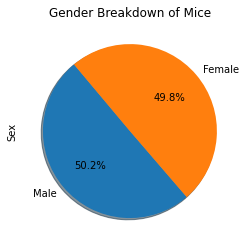

In [180]:
#pandas pie

sex_df.plot.pie(y='Sex',autopct="%1.1f%%",title = "Gender Breakdown of Mice",startangle=130,shadow=True)
plt.show()

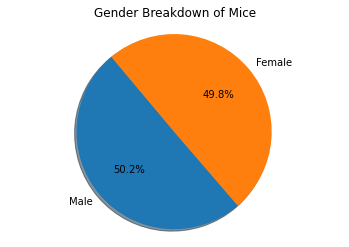

In [179]:
#matplotlib pie
labels=["Male","Female"]
count=sex_df

plt.title("Gender Breakdown of Mice")

plt.pie(count,labels=labels,autopct="%1.1f%%", shadow=True, startangle=130)
plt.axis("equal")
plt.show()

In [166]:
# Calculate the final tumor volume of each mouse 
# across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Calculate the quartiles and IQR and quantitatively determine if there 
# are any potential outliers across all four treatment regimens.

#https://stackoverflow.com/questions/42050339/pandas-get-highest-value-from-a-column-for-each-unique-value-in-another-column
final_tumor_vol = (mouse_study_clean.sort_values("Timepoint", ascending=False).drop_duplicates(['Mouse_ID']))
tumor_removed_dupes = final_tumor_vol.drop_duplicates(['Mouse_ID'])
promising_regimens = tumor_removed_dupes.loc[tumor_removed_dupes['Drug_Regimen'] ==  "Capomulin"]
promising_regimens1 = promising_regimens.append(tumor_removed_dupes.loc[tumor_removed_dupes['Drug_Regimen'] ==  "Infubinol"])
promising_regimens2 = promising_regimens1.append(tumor_removed_dupes.loc[tumor_removed_dupes['Drug_Regimen'] ==  "Ramicane"])
promising_regimens3 = promising_regimens2.append(tumor_removed_dupes.loc[tumor_removed_dupes['Drug_Regimen'] ==  "Ceftamin"])

# final_volume = promising_regimens3[["Drug_Regimen", "Tumor_Volume"]]
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
volume_by_mouse = promising_regimens3[["Mouse_ID", "Drug_Regimen", "Tumor_Volume"]]
volume_by_mouse

,Mouse_ID,Drug_Regimen,Tumor_Volume
134,r554,Capomulin,32.377357
144,m957,Capomulin,33.329098
164,t565,Capomulin,34.455298
124,y793,Capomulin,31.896238
104,u364,Capomulin,31.023923
...,...,...,...
940,h531,Ceftamin,47.784682
1743,x226,Ceftamin,45.000000
1583,u153,Ceftamin,45.000000
594,b447,Ceftamin,45.000000


In [167]:
# final_volume.to_list()

volume_list=[]
for drug in drug_list:
    final_volume = tumor_removed_dupes.loc[tumor_removed_dupes["Drug_Regimen"] == drug, 'Tumor_Volume']
    tumor_volume = (final_volume)
    volume_list.append(tumor_volume)
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


    print(f"Possible outliers for {drug}: {tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]}")

Possible outliers for Capomulin: Series([], Name: Tumor_Volume, dtype: float64)
Possible outliers for Ramicane: Series([], Name: Tumor_Volume, dtype: float64)
Possible outliers for Infubinol: 669    36.321346
Name: Tumor_Volume, dtype: float64
Possible outliers for Ceftamin: Series([], Name: Tumor_Volume, dtype: float64)


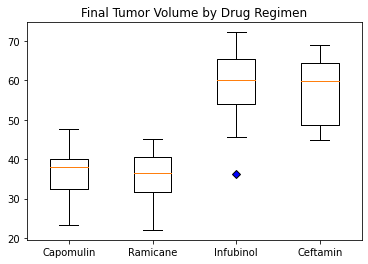

In [176]:
outliers = dict(markerfacecolor='b', marker = 'D')
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume by Drug Regimen')
ax7.boxplot(volume_list, labels=(drug_list), flierprops=outliers)

plt.show()

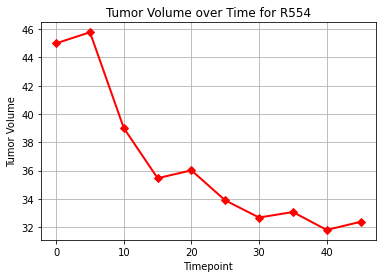

In [201]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. 
# time point for that mouse.

# r554
r554_data = mouse_study_clean[mouse_study_clean['Mouse_ID'] ==  "r554"]
r554_data

#PERCENTAGE CHANGE IN HAPPINESS YEAR OVER YEAR
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over Time for R554")
plt.grid()
plt.plot(r554_data['Timepoint'], r554_data['Tumor_Volume'],linewidth=2, marker ='D', color='red')


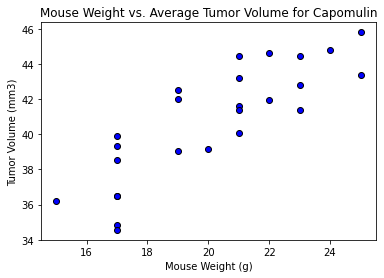

In [203]:
# * Generate a scatter plot of mouse weight 
# versus average tumor volume for the Capomulin treatment regimen.

capomulin_df = mouse_study_clean[mouse_study_clean['Drug_Regimen'] ==  "Capomulin"]
ave_cap =  capomulin_df.groupby('Mouse_ID').mean()
ave_cap
x_values = ave_cap['Weight(g)']
y_values = ave_cap['Tumor_Volume']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
# plt.plot(x_values,y_values)
# plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
# plt.xlim(0,2)
# print(f"The r-squared is: {rvalue**2}")
plt.show()

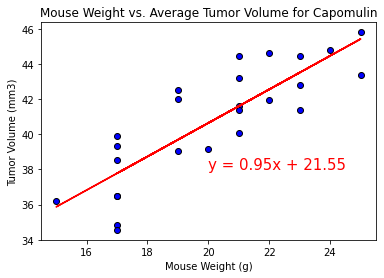

In [218]:
# * Calculate the correlation coefficient and linear regression model between mouse weight 
# and average tumor volume for the Capomulin treatment. Plot the linear regression model 
# on top of the previous scatter plot.

x_values = ave_cap['Weight(g)']
y_values = ave_cap['Tumor_Volume']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [223]:
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and tumor volume is 0.84


In [ ]:
# * Look across all previously generated figures and tables and write at least three observations 
# or inferences that can be made from the data. Include these observations at the top of notebook.
